In [1]:
import sympy as sm
from sympy import diff, Symbol
from scipy.integrate import odeint
import numpy as np
from sympy.physics.mechanics import dynamicsymbols
import math

In [2]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex="mathjax", pretty_print=False)

In [3]:
L0 = Symbol('L_0')
xc1,yc1,xc2,yc2,xt, yt,thetat ,thetac1,thetac2 = dynamicsymbols('x_c1 y_c1 x_c2 y_c2 x_t y_t theta_t theta_c1 theta_c2')
xc1,yc1,xc2,yc2,xt, yt,thetat ,thetac1,thetac2,L0

(x_c1, y_c1, x_c2, y_c2, x_t, y_t, theta_t, theta_c1, theta_c2, L_0)

In [4]:
dxc1,dyc1,dxc2,dyc2,dthetac1,dthetac2,dxt ,dyt, dthetat  = dynamicsymbols('x_c1 y_c1 x_c2 y_c2 theta_c1 theta_c2 x_t y_t theta_t',1)
ddxc1,ddyc1,ddxc2,ddyc2,ddthetac1,ddthetac2,ddxt, ddyt, ddthetat  = dynamicsymbols('x_c1 y_c1 x_c2 y_c2 theta_c1 theta_c2 x_t y_t theta_t',2)

In [5]:
ph1 = xc1-xt-L0*sm.cos(thetat)
ph2 = yc1-yt-L0*sm.sin(thetat)
ph3 = thetac1-thetat-np.pi
ph4 = xc2-xt+L0*sm.cos(thetat)
ph5 = yc2-yt+L0*sm.sin(thetat)
ph6 = thetac2-thetat

In [6]:
dph1 = sm.diff(ph1,'t',1)
dph2 = sm.diff(ph2,'t',1)
dph3 = sm.diff(ph3,'t',1)
dph4 = sm.diff(ph4,'t',1)
dph5 = sm.diff(ph5,'t',1)
dph6 = sm.diff(ph6,'t',1)

ddph1 = sm.diff(ph1,'t',2)
ddph2 = sm.diff(ph2,'t',2)
ddph3 = sm.diff(ph3,'t',2)
ddph4 = sm.diff(ph4,'t',2)
ddph5 = sm.diff(ph5,'t',2)
ddph6 = sm.diff(ph6,'t',2)

In [7]:
dynamics_sol = sm.solve([ddph1,ddph2,ddph3,ddph4,ddph5,ddph6],[ddxc1,ddyc1,ddxc2,ddyc2,ddthetac1,ddthetac2])

In [8]:
A = np.identity(6)

In [9]:
def getb(alpha,gamma):
    b1 = dynamics_sol[ddxc1] - alpha*(dph1) - gamma*(ph1)
    b2 = dynamics_sol[ddyc1] - alpha*(dph2) - gamma*(ph2)
    b3 = dynamics_sol[ddthetac1] - alpha*(dph3) - gamma*(ph3)
    b4 = dynamics_sol[ddxc2] - alpha*(dph4) - gamma*(ph4)
    b5 = dynamics_sol[ddyc2] - alpha*(dph5) - gamma*(ph5)
    b6 = dynamics_sol[ddthetac2] - alpha*(dph6) - gamma*(ph6)
    return sm.Matrix([b1,b2,b3,b4,b5,b6])

In [10]:
mc1,mc2,jc1,jc2 = 1,1,0.5,0.5
M = sm.diag(mc1,mc1,jc1,mc2, mc2,jc2)

In [11]:
F = sm.zeros(6,1)

In [12]:
b = getb(2,1)

In [13]:
Fc =  M**(1/2)*sm.Matrix.pinv(A*(M**(-1/2)))*(b-(A*(M**(-1))*F))

In [14]:
rf = F + Fc

In [15]:
a = M.inv()@rf
a

Matrix([
[-2.0*L_0*sin(theta_t)*theta_t' - 1.0*L_0*sin(theta_t)*theta_t'' - 1.0*L_0*cos(theta_t)*theta_t'**2 + 1.0*L_0*cos(theta_t) - 1.0*x_c1 + 1.0*x_t - 2.0*x_c1' + 2.0*x_t' + 1.0*x_t''],
[-1.0*L_0*sin(theta_t)*theta_t'**2 + 1.0*L_0*sin(theta_t) + 2.0*L_0*cos(theta_t)*theta_t' + 1.0*L_0*cos(theta_t)*theta_t'' - 1.0*y_c1 + 1.0*y_t - 2.0*y_c1' + 2.0*y_t' + 1.0*y_t''],
[                                                                                    -1.0*theta_c1 + 1.0*theta_t - 2.0*theta_c1' + 2.0*theta_t' + 1.0*theta_t'' + 3.14159265358979],
[ 2.0*L_0*sin(theta_t)*theta_t' + 1.0*L_0*sin(theta_t)*theta_t'' + 1.0*L_0*cos(theta_t)*theta_t'**2 - 1.0*L_0*cos(theta_t) - 1.0*x_c2 + 1.0*x_t - 2.0*x_c2' + 2.0*x_t' + 1.0*x_t''],
[ 1.0*L_0*sin(theta_t)*theta_t'**2 - 1.0*L_0*sin(theta_t) - 2.0*L_0*cos(theta_t)*theta_t' - 1.0*L_0*cos(theta_t)*theta_t'' - 1.0*y_c2 + 1.0*y_t - 2.0*y_c2' + 2.0*y_t' + 1.0*y_t''],
[                                                                                     

In [16]:
a_func = sm.lambdify([L0,
                      ddxt ,ddyt,ddthetat,
                      dxt ,dyt,dthetat,
                      dxc1,dyc1,dthetac1,
                      dxc2,dyc2,dthetac2,
                      xt, yt,thetat,
                      xc1,yc1,thetac1,
                      xc2,yc2,thetac2], a)

In [17]:
Mt = np.diag([1,1,0.5])
at = np.linalg.inv(Mt)@np.array([-0.2*np.cos(np.pi/4),.2*np.sin(np.pi/4),0])

In [18]:
dx_func = lambda dx : dx

def dSdt(S,t,ddt,L):
    #print(S, t)
    #target - S[0],S[1],S[2],S[3],S[4],S[5]
    #chaser 1 - S[6],S[7],S[8],S[9],S[10],S[11]
    #chaser 2 - S[12],S[13],S[14],S[15],S[16],S[17]
    ddc = a_func(L,
                 ddt[0],ddt[1],ddt[2],
                 
                 S[1],S[3],S[5],
                 S[7],S[9],S[11],
                 S[13],S[15],S[17],
                 
                 S[0],S[2],S[4],
                 S[6],S[8],S[10],
                 S[12],S[14],S[16])
                 
    return [
        dx_func(S[1]),
        ddt[0],
        dx_func(S[3]),
        ddt[1],
        dx_func(S[5]),
        ddt[2],
        dx_func(S[7]),
        ddc[0],
        dx_func(S[9]),
        ddc[1],
        dx_func(S[11]),
        ddc[2],
        dx_func(S[13]),
        ddc[3],
        dx_func(S[15]),
        ddc[4],
        dx_func(S[17]),
        ddc[5],
    ]

In [43]:
t = np.linspace(0, 12, 1000)
ans = odeint(dSdt, y0=[0,-1,0,0.3,0,1.2, 5,0.5,2.5, 0.5,np.pi,0.9,  10,0.1,0, -1,0,0.5 ],args=(at,10), t=t)

In [70]:
tx = ans.T[0]
ty = ans.T[2]
t_theta = ans.T[4]

dtx = ans.T[1]
dty = ans.T[3]
dt_theta = ans.T[5]

cx1 = ans.T[6]
cy1 = ans.T[8]
cth1 = ans.T[10]

dcth1 = ans.T[11]

cx2 = ans.T[12]
cy2 = ans.T[14]
cth2 = ans.T[16]

dcth2 = ans.T[17]

In [97]:
import matplotlib.pyplot as plt

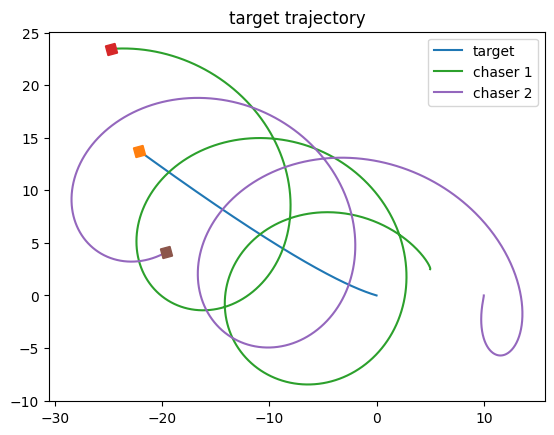

In [116]:
plt.plot(tx, ty,label='target')
plt.plot(tx[-1], ty[-1], marker=(4, 0,np.degrees(t_theta[-1]+np.pi/4)), markersize=10)
plt.plot(cx1, cy1,label='chaser 1')
plt.plot(cx1[-1], cy1[-1], marker=(4, 0,np.degrees(cth1[-1]+np.pi/4)), markersize=10)
plt.plot(cx2, cy2,label='chaser 2')
plt.plot(cx2[-1], cy2[-1], marker=(4, 0,np.degrees(cth2[-1]+np.pi/4)), markersize=10)
plt.title("target trajectory")
plt.legend()

Text(0.5, 1.0, 'Position time history')

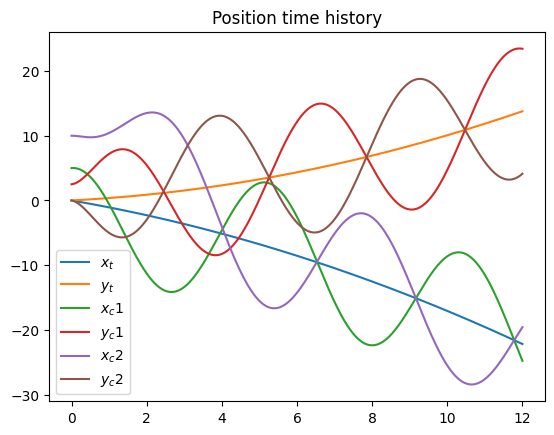

In [73]:
plt.plot(t,tx, t,ty, t,cx1, t,cy1, t,cx2, t,cy2)
plt.gca().legend(('$x_t$','$y_t$','$x_c1$','$y_c1$','$x_c2$','$y_c2$'))
plt.title("Position time history")

Text(0.5, 1.0, 'Angular displacement time history')

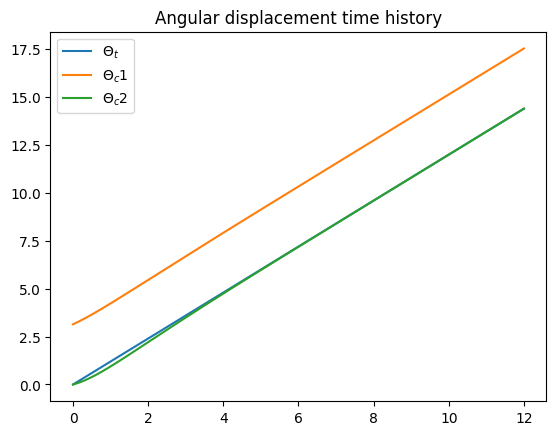

In [74]:
plt.plot(t,t_theta, t,cth1, t,cth2)
plt.gca().legend(('${\Theta}_t$','${\Theta}_c1$','${\Theta}_c2$'))
plt.title("Angular displacement time history")

Text(0.5, 1.0, 'Absolute angular velocity.')

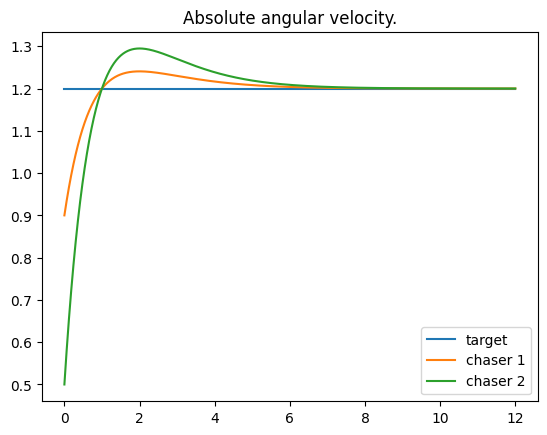

In [75]:
plt.plot(t,dt_theta, t,dcth1, t,dcth2)
plt.gca().legend(('target','chaser 1', 'chaser 2'))
plt.title("Absolute angular velocity.")